In [1]:
# modul import
import pandas as pd
import numpy as np
import tensorflow as tf
import collections
from konlpy.tag import Twitter
import re
import math
import random
import pandas as pd

In [2]:
# data load
df=pd.read_csv("pk_data_g1.csv")

In [3]:
# desc
df['desc']

0      태어날 때부터 등에 식물의 씨앗이 있어 조금씩 크게 자란다.태어났을 때부터 등에 이...
1      꽃봉오리가 등에 붙어 있으며 양분을 흡수해가면 커다란 꽃이 핀다고 한다.등의 꽃봉오...
2      꽃에서 황홀한 향기가 퍼져나가 싸우는 자의 기분을 달래게 한다.태양 에너지를 영양으...
3      태어날 때부터 꼬리의 불꽃이 타오르고 있다. 불꽃이 꺼지면 그 생명이 다하고 만다....
4      꼬리를 휘둘러 상대를 쓰러트리고 날카로운 발톱으로 갈기갈기 찢어버린다.불타는 꼬리를...
5      지상 1400미터까지 날개를 사용해 나는 것이 가능하다. 고열의 불꽃을 내뿜는다.암...
6      긴 목을 등껍질 안에 움추릴 때 강한 물대포를 발사한다.태어난 후 등이 부풀어 단단...
7      애완동물으로서 인기가 높다. 또 털로 감싸진 꼬리는 장수의 상징이다.자주 수중에 숨...
8      무거운 몸으로 상대를 덮쳐서 기절시킨다. 위기에 처하면 등껍질에 숨는다.등껍질에 분...
9      푸른 피부로 감싸져 있다. 탈피하여 성장하면 실을 늘어뜨려 번데기로 바꾼다.발은 짧...
10     단단한 껍질에 둘러싸여 있으나 안은 부드러워서 강한 공격에는 견디지 못한다.껍질이 ...
11     물을 튕겨내는 가루가 날개를 보호하고 있다. 비가 오는 날에도 하늘을 날 수 있다....
12     숲이나 풀밭에 많이 서식한다. 머리끝에 5cm 정도의 작고 날카로운 독침을 지니고 ...
13     성체의 몸을 만들기 위해서 일시적인 상태. 스스로로도 거의 움직이지 않는다.스스로는...
14     집단으로 나타나기도 한다. 맹렬한 스피드로 날아 엉덩이의 독침으로 마구 찌른다.고속...
15     싸움을 좋아하지 않는다. 풀 숲 안에 숨어 작은 벌레 등을 잡는다.숲이나 수풀에 많...
16     발톱이 발달해 있다. 먹이인 아라리를 잡아 100km 떨어져 있는 둥지까지 나른다....
17     아름다운 날개를 펼쳐 상대를 위협한다. 마하

In [4]:
# data 정제, 띄어쓰기 기준으로 분리
desc_list = []
words = []
for desc in df['desc'][0].split('.'): # 한 포켓몬에 대해서 정리 한 포켓몬
    desc_list.append(desc)
    sentence = re.sub(r"[^ㄱ-힣a-zA-Z0-9]+", ' ', desc).strip().split()
    if sentence:
        words.append(sentence)
        print(sentence)

['태어날', '때부터', '등에', '식물의', '씨앗이', '있어', '조금씩', '크게', '자란다']
['태어났을', '때부터', '등에', '이상한', '씨앗이', '심어져', '있으며', '몸과', '함께', '자란다고', '한다']
['며칠', '동안', '아무것도', '먹지', '않아도', '건강']
['등의', '씨앗에', '많은', '영양이', '있기에', '괜찮다']
['등의', '씨앗', '안에는', '영양이', '듬뿍']
['씨앗은', '몸과', '같이', '커지고', '있다']
['태어날', '때부터', '등에', '씨앗을', '짊어지고', '있다']
['몸이', '커지면', '자란만큼', '씨앗도', '커지게', '된다']
['태어나서', '잠깐', '동안', '등의', '씨앗에', '모인', '영양을', '받고', '자란다']
['양지에서', '낮잠', '자는', '모습을', '볼', '수', '있다']
['태양의', '빛을', '많이', '받으면', '등의', '씨앗이', '크게', '자란다']
['태어날', '때부터', '등에', '식물의', '씨앗이', '있어', '조금씩', '크게', '자란다']
['태어났을', '때부터', '등에', '이상한', '씨앗이', '심어져', '있으며', '몸과', '함께', '자란다고', '한다']
['태어나면서', '잠깐', '동안', '등의', '씨앗에서', '영양을', '받으며', '크게', '자란다']
['태어나서부터', '얼마', '동안은', '등의', '씨앗으로부터', '영양을', '공급받아', '크게', '성장한다']
['등의', '씨앗', '안에는', '영양이', '가득하다']
['씨앗은', '몸과', '함께', '커진다']
['태어날', '때부터', '등에', '씨앗을', '짊어지고', '있다']
['몸이', '크게', '성장함에', '따라', '씨앗도', '커진다']
['태어나서부터', '얼마', '동안은', '등의', '씨앗으로부터', '영양을', '공급받아', '크게', 

In [5]:
# 단어의 빈도수를 세고 빈도수가 일정 이상인 단어만 저장한다.
word_counter = [['UNK', -1]] # 빈도수 문제로 word_dict에 없는 word를 처리하기 위함. unknown
word_counter.extend(collections.Counter([word for sentence in words for word in sentence]).most_common())
print(word_counter)
word_counter = [item for item in word_counter if item[1] >= 0 or item[0] == 'UNK']
print(word_counter)

# 저장한 단어의 index를 지정하고 저장.
word_dict = dict()
for word, count in word_counter:
    word_dict[word] = len(word_dict)
word_reverse_dict = dict(zip(word_dict.values(), word_dict.keys()))
print(len(word_dict))
print(word_dict)
print(word_reverse_dict)

[['UNK', -1], ('등의', 10), ('크게', 9), ('때부터', 7), ('등에', 7), ('씨앗이', 7), ('자란다', 6), ('몸과', 5), ('있다', 5), ('영양을', 5), ('태어날', 4), ('함께', 4), ('태어났을', 3), ('이상한', 3), ('심어져', 3), ('있으며', 3), ('자란다고', 3), ('한다', 3), ('동안', 3), ('영양이', 3), ('태어나서부터', 3), ('얼마', 3), ('동안은', 3), ('씨앗으로부터', 3), ('공급받아', 3), ('성장한다', 3), ('식물의', 2), ('있어', 2), ('조금씩', 2), ('씨앗에', 2), ('씨앗', 2), ('안에는', 2), ('씨앗은', 2), ('씨앗을', 2), ('짊어지고', 2), ('몸이', 2), ('씨앗도', 2), ('잠깐', 2), ('양지에서', 2), ('낮잠', 2), ('자는', 2), ('모습을', 2), ('볼', 2), ('수', 2), ('태양의', 2), ('빛을', 2), ('많이', 2), ('받으면', 2), ('커진다', 2), ('며칠', 1), ('아무것도', 1), ('먹지', 1), ('않아도', 1), ('건강', 1), ('많은', 1), ('있기에', 1), ('괜찮다', 1), ('듬뿍', 1), ('같이', 1), ('커지고', 1), ('커지면', 1), ('자란만큼', 1), ('커지게', 1), ('된다', 1), ('태어나서', 1), ('모인', 1), ('받고', 1), ('태어나면서', 1), ('씨앗에서', 1), ('받으며', 1), ('가득하다', 1), ('성장함에', 1), ('따라', 1)]
[['UNK', -1], ('등의', 10), ('크게', 9), ('때부터', 7), ('등에', 7), ('씨앗이', 7), ('자란다', 6), ('몸과', 5), ('있다', 5), ('영양을', 5), ('태어날', 4), ('

In [6]:
word_dict

{'UNK': 0,
 '등의': 1,
 '크게': 2,
 '때부터': 3,
 '등에': 4,
 '씨앗이': 5,
 '자란다': 6,
 '몸과': 7,
 '있다': 8,
 '영양을': 9,
 '태어날': 10,
 '함께': 11,
 '태어났을': 12,
 '이상한': 13,
 '심어져': 14,
 '있으며': 15,
 '자란다고': 16,
 '한다': 17,
 '동안': 18,
 '영양이': 19,
 '태어나서부터': 20,
 '얼마': 21,
 '동안은': 22,
 '씨앗으로부터': 23,
 '공급받아': 24,
 '성장한다': 25,
 '식물의': 26,
 '있어': 27,
 '조금씩': 28,
 '씨앗에': 29,
 '씨앗': 30,
 '안에는': 31,
 '씨앗은': 32,
 '씨앗을': 33,
 '짊어지고': 34,
 '몸이': 35,
 '씨앗도': 36,
 '잠깐': 37,
 '양지에서': 38,
 '낮잠': 39,
 '자는': 40,
 '모습을': 41,
 '볼': 42,
 '수': 43,
 '태양의': 44,
 '빛을': 45,
 '많이': 46,
 '받으면': 47,
 '커진다': 48,
 '며칠': 49,
 '아무것도': 50,
 '먹지': 51,
 '않아도': 52,
 '건강': 53,
 '많은': 54,
 '있기에': 55,
 '괜찮다': 56,
 '듬뿍': 57,
 '같이': 58,
 '커지고': 59,
 '커지면': 60,
 '자란만큼': 61,
 '커지게': 62,
 '된다': 63,
 '태어나서': 64,
 '모인': 65,
 '받고': 66,
 '태어나면서': 67,
 '씨앗에서': 68,
 '받으며': 69,
 '가득하다': 70,
 '성장함에': 71,
 '따라': 72}

In [7]:
# 전체 데이터에 대해서 
def build_dataset(train_text, min_count, sampling_rate):
    words = list()
    for line in desc_list:
        sentence = re.sub(r"[^ㄱ-힣a-zA-Z0-9]+", ' ', line).strip().split()
        if sentence:
            words.append(sentence)

    word_counter = [['UNK', -1]]
    word_counter.extend(collections.Counter([word for sentence in words for word in sentence]).most_common())
    word_counter = [item for item in word_counter if item[1] >= min_count or item[0] == 'UNK']

    word_dict = dict()
    for word, count in word_counter:
        word_dict[word] = len(word_dict)
    word_reverse_dict = dict(zip(word_dict.values(), word_dict.keys()))

    word_to_pos_li = dict()
    pos_list = list()
    twitter = Twitter()
    for w in word_dict:
        w_pos_li = list()
        for pos in twitter.pos(w, norm=True):
            w_pos_li.append(pos)

        word_to_pos_li[word_dict[w]] = w_pos_li
        pos_list += w_pos_li

    pos_counter = collections.Counter(pos_list).most_common()

    pos_dict = dict()
    for pos, _ in pos_counter:
        pos_dict[pos] = len(pos_dict)

    pos_reverse_dict = dict(zip(pos_dict.values(), pos_dict.keys()))

    word_to_pos_dict = dict()

    for word_id, pos_li in word_to_pos_li.items():
        pos_id_li = list()
        for pos in pos_li:
            pos_id_li.append(pos_dict[pos])
        word_to_pos_dict[word_id] = pos_id_li

    data = list()
    unk_count = 0
    for sentence in words:
        s = list()
        for word in sentence:
            if word in word_dict:
                index = word_dict[word]
            else:
                index = word_dict['UNK']
                unk_count += 1
            s.append(index)
        data.append(s)
    word_counter[0][1] = max(1, unk_count)

    data = sub_sampling(data, word_counter, word_dict, sampling_rate)

    return data, word_dict, word_reverse_dict, pos_dict, pos_reverse_dict, word_to_pos_dict

def sub_sampling(data, word_counter, word_dict, sampling_rate):
    total_words = sum([len(sentence) for sentence in data])
    # print("total_words: {}".format(total_words))
    prob_dict = dict()
    for word, count in word_counter:
        f = count / total_words # 빈도수가 많을수록 f가 1에 가까워짐.
        p = max(0, 1 - math.sqrt(sampling_rate / f)) # sampling_rate가 0.0001이면 f가 클수록 prob이 커진다.
        prob_dict[word_dict[word]] = p
        # print("count : {}, f : {}, p : {}, prob_dict : {}".format(count, f, p, prob_dict))

    new_data = list()
    for sentence in data:
        s = list()
        for word in sentence:
            prob = prob_dict[word]
            if random.random() > prob: # prob이 작을수록 s에 저장되기 쉬움.
                s.append(word)
        new_data.append(s)

    return new_data

In [8]:
# crawling한 데이터를 불러온다.
pk_data = pd.read_csv('pk_data_g1.csv')
desc_list = []
for i in range(len(pk_data)):
    for desc in pk_data['desc'][i].split('.'):
        desc_list.append(desc)

sampling_rate = 0.0001
min_count = 5

# dataset 만들기
data, word_dict, word_reverse_dict, pos_dict, pos_reverse_dict, word_to_pos_dict \
        = build_dataset(desc_list, min_count, sampling_rate)
    

C:\Users\ryu07\Anaconda3\envs\pk_story\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [13]:
data

[[282, 59, 558],
 [874, 427, 876, 428],
 [0, 91, 726, 727],
 [1299, 1300, 383],
 [58, 1301, 1300],
 [1302],
 [282, 0],
 [],
 [1303, 91, 58, 1299, 635, 345, 1037],
 [145, 2],
 [53, 58, 184],
 [426, 282, 59, 558, 874, 55, 184],
 [282, 59, 874, 876, 428],
 [184],
 [345, 55, 728],
 [1301, 1304],
 [],
 [282],
 [55, 234, 0],
 [0, 345, 728],
 [634, 282, 874, 427],
 [728],
 [96, 2],
 [233, 874, 184],
 [559, 346, 427, 877, 283],
 [58, 559, 878, 146],
 [877, 1037, 1038, 729, 879, 730, 283],
 [233, 63, 1039, 58, 559],
 [58, 730, 283],
 [],
 [1040],
 [1041, 636],
 [283],
 [877],
 [58, 559, 878, 110],
 [58, 385, 729, 105],
 [283],
 [58, 1306],
 [1040],
 [637, 69, 559],
 [730, 283, 880],
 [1306, 147, 105],
 [14, 1040],
 [346, 283],
 [386, 1306, 385, 147],
 [14],
 [636],
 [310, 4, 44],
 [729],
 [732, 387],
 [119],
 [733, 732, 1043],
 [1307, 734, 732, 82, 12],
 [732, 233],
 [233, 1308, 43, 259],
 [429],
 [311],
 [1042, 729, 0],
 [732, 387],
 [0],
 [235, 561, 58, 636],
 [1044, 640],
 [1307, 734, 637, 1

In [4]:
words=[]
for text in corpus:
    for word in text.split(' '):
        words.append(word)
        
words=set(words)

In [14]:
vocabulary_size = len(word_dict)
pos_size = len(pos_dict)
num_sentences = len(data)

print("number of sentences :", num_sentences)
print("vocabulary size :", vocabulary_size)
print("pos size :", pos_size)

pos_li = []
for key in sorted(pos_reverse_dict):
    pos_li.append(pos_reverse_dict[key])

number of sentences : 4799
vocabulary size : 1660
pos size : 1339


In [15]:
pos_li # 형태소

[('을', 'Josa'),
 ('이', 'Josa'),
 ('의', 'Josa'),
 ('를', 'Josa'),
 ('에', 'Josa'),
 ('가', 'Josa'),
 ('로', 'Josa'),
 ('에서', 'Josa'),
 ('은', 'Josa'),
 ('으로', 'Josa'),
 ('한다', 'Verb'),
 ('는', 'Josa'),
 ('도', 'Josa'),
 ('한', 'Josa'),
 ('것', 'Noun'),
 ('때', 'Noun'),
 ('몸', 'Noun'),
 ('이다', 'Josa'),
 ('에는', 'Josa'),
 ('포켓몬', 'Noun'),
 ('고', 'Josa'),
 ('사람', 'Noun'),
 ('껍질', 'Noun'),
 ('할', 'Verb'),
 ('상대', 'Noun'),
 ('꼬리', 'Noun'),
 ('개', 'Noun'),
 ('하는', 'Verb'),
 ('등', 'Noun'),
 ('날개', 'Noun'),
 ('뿔', 'Noun'),
 ('사용', 'Noun'),
 ('와', 'Josa'),
 ('머리', 'Noun'),
 ('헤엄', 'Noun'),
 ('까지', 'Josa'),
 ('공격', 'Noun'),
 ('km', 'Alpha'),
 ('불꽃', 'Noun'),
 ('배', 'Noun'),
 ('눈', 'Noun'),
 ('알', 'Noun'),
 ('바다', 'Noun'),
 ('하면', 'Verb'),
 ('곳', 'Noun'),
 ('날', 'Noun'),
 ('소리', 'Noun'),
 ('전신', 'Noun'),
 ('안', 'Noun'),
 ('독', 'Noun'),
 ('성격', 'Noun'),
 ('피부', 'Noun'),
 ('가스', 'Noun'),
 ('끝', 'Noun'),
 ('위', 'Noun'),
 ('먹이', 'Noun'),
 ('주변', 'Noun'),
 ('된', 'Verb'),
 ('다', 'Adverb'),
 ('번', 'Noun'),
 ('자신', 

In [5]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [9]:
word2int={}

for i,word in enumerate(words):
    word2int[word]=i
    
    
sentences=[]

for sentence in corpus:
    sentences.append(sentence.split())
    
    
WINDOW_SIZE=2

data=[]
for sentence in sentences:
    for idx,word in enumerate(sentence):
        for neighbor in sentence[max(idx-WINDOW_SIZE,0) : min(idx+WINDOW_SIZE, len(sentence))+1]:
            if neighbor !=word:
                data.append([word,neighbor])

In [20]:
sentences=data
WINDOW_SIZE=2

data=[]
for sentence in sentences:
    for idx,word in enumerate(sentence):
        for neighbor in sentence[max(idx-WINDOW_SIZE,0) : min(idx+WINDOW_SIZE, len(sentence))+1]:
            if neighbor !=word:
                data.append([word,neighbor])

In [21]:
data

[[282, 59],
 [282, 558],
 [59, 282],
 [59, 558],
 [558, 282],
 [558, 59],
 [874, 427],
 [874, 876],
 [427, 874],
 [427, 876],
 [427, 428],
 [876, 874],
 [876, 427],
 [876, 428],
 [428, 427],
 [428, 876],
 [0, 91],
 [0, 726],
 [91, 0],
 [91, 726],
 [91, 727],
 [726, 0],
 [726, 91],
 [726, 727],
 [727, 91],
 [727, 726],
 [1299, 1300],
 [1299, 383],
 [1300, 1299],
 [1300, 383],
 [383, 1299],
 [383, 1300],
 [58, 1301],
 [58, 1300],
 [1301, 58],
 [1301, 1300],
 [1300, 58],
 [1300, 1301],
 [282, 0],
 [0, 282],
 [1303, 91],
 [1303, 58],
 [91, 1303],
 [91, 58],
 [91, 1299],
 [58, 1303],
 [58, 91],
 [58, 1299],
 [58, 635],
 [1299, 91],
 [1299, 58],
 [1299, 635],
 [1299, 345],
 [635, 58],
 [635, 1299],
 [635, 345],
 [635, 1037],
 [345, 1299],
 [345, 635],
 [345, 1037],
 [1037, 635],
 [1037, 345],
 [145, 2],
 [2, 145],
 [53, 58],
 [53, 184],
 [58, 53],
 [58, 184],
 [184, 53],
 [184, 58],
 [426, 282],
 [426, 59],
 [282, 426],
 [282, 59],
 [282, 558],
 [59, 426],
 [59, 282],
 [59, 558],
 [59, 874],

In [13]:
import pandas as pd
for text in corpus:
    print(text)

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [22]:
df=pd.DataFrame(data,columns=['input','label'])

In [23]:
df.head()

,input,label
0,282,59
1,282,558
2,59,282
3,59,558
4,558,282


In [16]:
word2int

{'prince': 0,
 'king': 1,
 'woman': 2,
 'princess': 3,
 'wise': 4,
 'queen': 5,
 'strong': 6,
 'girl': 7,
 'pretty': 8,
 'man': 9,
 'boy': 10,
 'young': 11}

In [27]:
len(word_dict)

1660

In [28]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(word_dict) # 인코딩 차원

# one_hot_encoding code
def to_one_hot_encoding(data_point_index):
    one_hot_encoding=np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index]=1
    return one_hot_encoding


X=[]
Y=[]

for x,y in zip(df['input'],df['label']):
    X.append(to_one_hot_encoding(x))
    Y.append(to_one_hot_encoding(y))
    
    
X_train=np.asarray(X)
Y_train=np.asarray(Y)


x=tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label=tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))


EMBEDDING_DIM=2

W1=tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1=tf.Variable(tf.random_normal([1]))
hidden_layer=tf.add(tf.matmul(x,W1),b1)


W2=tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2=tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)


In [31]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 10000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 100 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  9.054945
iteration 100 loss is :  8.415928
iteration 200 loss is :  8.385158
iteration 300 loss is :  8.358458
iteration 400 loss is :  8.3347435
iteration 500 loss is :  8.313315
iteration 600 loss is :  8.2937
iteration 700 loss is :  8.27556
iteration 800 loss is :  8.25864
iteration 900 loss is :  8.242756
iteration 1000 loss is :  8.227757
iteration 1100 loss is :  8.213523
iteration 1200 loss is :  8.199963
iteration 1300 loss is :  8.186996
iteration 1400 loss is :  8.17456
iteration 1500 loss is :  8.162607
iteration 1600 loss is :  8.151078
iteration 1700 loss is :  8.139948
iteration 1800 loss is :  8.129172
iteration 1900 loss is :  8.118727
iteration 2000 loss is :  8.108592
iteration 2100 loss is :  8.098741
iteration 2200 loss is :  8.089162
iteration 2300 loss is :  8.07982
iteration 2400 loss is :  8.070719
iteration 2500 loss is :  8.061839
iteration 2600 loss is :  8.053165
iteration 2700 loss is :  8.044688
iteration 2800 loss is :  8.036402
it

KeyboardInterrupt: 

In [32]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.08599679 -0.00626668]
 [-0.29629996 -0.20161179]
 [ 0.11288676  0.27402264]
 ...
 [-0.6178235  -1.3038802 ]
 [-0.46834755  1.2442465 ]
 [-0.08681972 -0.75425744]]


In [38]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = word_dict.keys()
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,UNK,-0.085997,-0.006267
1,있다,-0.296300,-0.201612
2,수,0.112887,0.274023
3,한다,-0.161111,0.416061
4,있는,-0.053792,-0.318709
5,몸을,0.030627,0.939552
6,때문에,0.242607,-0.049751
7,먹이를,0.831374,-1.243734
8,않는다,-0.413713,-0.127777
9,포켓몬이다,0.474344,-0.581743


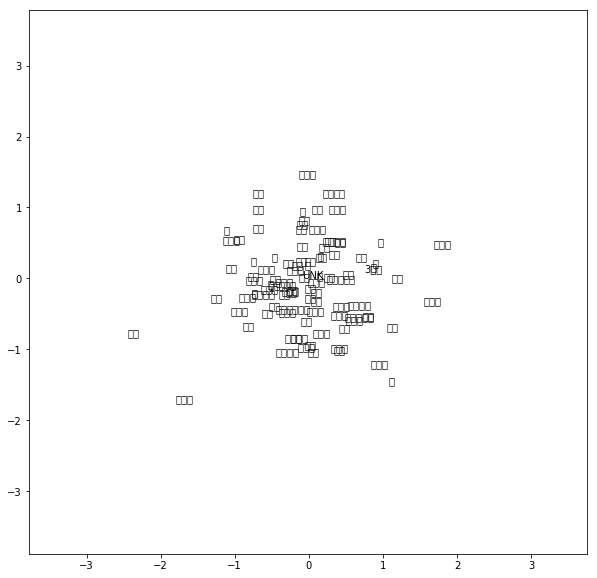

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [44]:
# save
w2v_df.to_csv("w2v_2dim.csv", encoding='utf-8-sig')

In [45]:
# embedding dim : 40
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(word_dict) # 인코딩 차원

# one_hot_encoding code
def to_one_hot_encoding(data_point_index):
    one_hot_encoding=np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index]=1
    return one_hot_encoding


X=[]
Y=[]

for x,y in zip(df['input'],df['label']):
    X.append(to_one_hot_encoding(x))
    Y.append(to_one_hot_encoding(y))
    
    
X_train=np.asarray(X)
Y_train=np.asarray(Y)


x=tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label=tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))


EMBEDDING_DIM=40 # dim 40

W1=tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1=tf.Variable(tf.random_normal([1]))
hidden_layer=tf.add(tf.matmul(x,W1),b1)


W2=tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2=tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)


In [47]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 10000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 100 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  22.005995
iteration 100 loss is :  21.642157
iteration 200 loss is :  21.360855
iteration 300 loss is :  21.105356
iteration 400 loss is :  20.868816
iteration 500 loss is :  20.647598
iteration 600 loss is :  20.43929
iteration 700 loss is :  20.242119
iteration 800 loss is :  20.054735
iteration 900 loss is :  19.876045
iteration 1000 loss is :  19.705103
iteration 1100 loss is :  19.541182
iteration 1200 loss is :  19.383614
iteration 1300 loss is :  19.231825
iteration 1400 loss is :  19.085312
iteration 1500 loss is :  18.943659
iteration 1600 loss is :  18.806484
iteration 1700 loss is :  18.673466


KeyboardInterrupt: 

In [48]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.23415338  0.03543666  0.37657863 ...  0.02429308  0.19688109
  -0.10118442]
 [ 1.213457    1.5747799   2.180442   ... -0.32377374 -0.62782407
   1.6343385 ]
 [-0.04210705  0.612531    0.8522206  ...  0.3229412  -1.0958914
   2.5371804 ]
 ...
 [ 0.03473891 -0.40966868 -0.53689104 ... -1.2554612   1.2537296
  -1.5299201 ]
 [-0.4206702   0.73669225  2.0088449  ...  2.2729251   1.049582
  -0.06512707]
 [-1.0229073  -0.27157593  1.0711851  ... -1.8280927  -1.1182139
  -0.35477644]]


In [50]:
w2v_df = pd.DataFrame(vectors)
w2v_df['word'] = word_dict.keys()

In [52]:
# save
w2v_df.to_csv("w2v_40dim.csv", encoding='utf-8-sig')